**Thông tin sinh viên**

MSSV: 20520275 <br />
Họ tên: Danh Võ Hồng Phúc<br />
Bài tập: bài tập 7<br />
Ngày thực hiện: 13/5/2022

# **Import Libraries**

In [6]:
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
%cd '/content/drive/MyDrive/CS231.M21.KHTN/Baitap/Baitap7/images'

/content/drive/.shortcut-targets-by-id/13C37EedUSDnRymGA5rWpsqcry8w0txyr/CS231.M21.KHTN/Baitap/Baitap7/images


# **1. Key points**

In [22]:
!pip install opencv-python==4.5.5.64
!pip install opencv-contrib-python==4.5.5.64

     |████████████████████████████████| 60.5 MB 99 kB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 3.4.2.17
    Uninstalling opencv-python-3.4.2.17:
      Successfully uninstalled opencv-python-3.4.2.17
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 66.7 MB 1.6 MB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 3.4.2.17
    Uninstalling opencv-contrib-python-3.4.2.17:
      Successfully uninstalled opencv-contrib-python-3.4.2.17


## **Cow1 and Cow2**

In [41]:
import cv2 as cv

def ORBimg(src_img):
  img = cv.imread(src_img)
  # Initiate ORB detector
  orb = cv.ORB_create()
  # find the keypoints with ORB
  kp = orb.detect(img,None)
  # compute the descriptors with ORB
  kp, des = orb.compute(img, kp)
  # draw only keypoints location,not size and orientation
  img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
  plt.imshow(img2), plt.show()

In [44]:
import cv2 as cv
def BRIEFimg(src_img):
  img = cv.imread(src_img)
  # Initiate FAST detector
  star = cv.xfeatures2d.StarDetector_create()
  # Initiate BRIEF extractor
  brief = cv.xfeatures2d.BriefDescriptorExtractor_create()
  # find the keypoints with STAR
  kp = star.detect(img,None)
  # compute the descriptors with BRIEF
  kp, des = brief.compute(img, kp)
  img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
  plt.imshow(img2), plt.show()

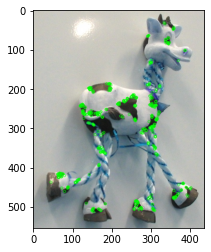

In [42]:
ORBimg('cow1.jpg')

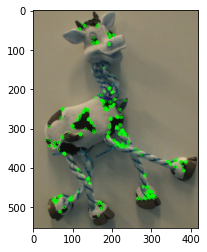

In [43]:
ORBimg('cow2.jpg')

## **Ảnh match1 và match2**

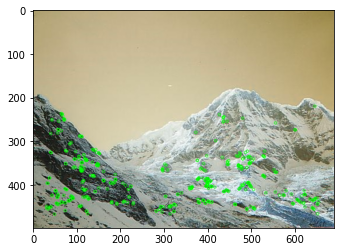

In [45]:
ORBimg('match1.jpg')

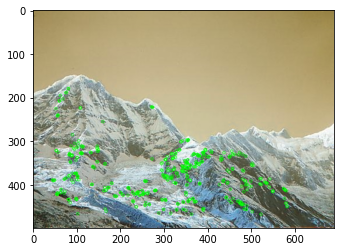

In [46]:
ORBimg('match2.jpg')

## **Ảnh graf và graf**

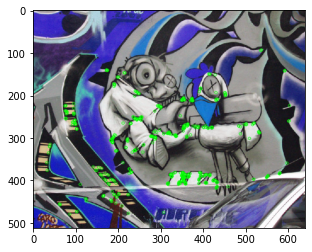

In [47]:
ORBimg('graf_img1.jpg')

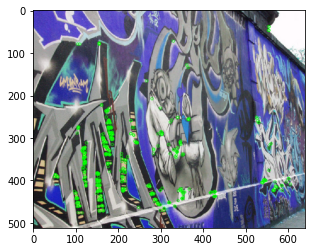

In [48]:
ORBimg('graf_img5.jpg')

## **Ảnh butterfly**

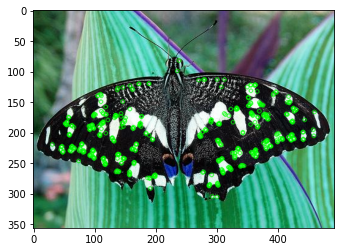

In [51]:
ORBimg('butterfly.jpg')

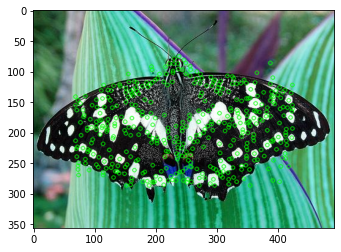

In [52]:
BRIEFimg('butterfly.jpg')

## **Ảnh home**

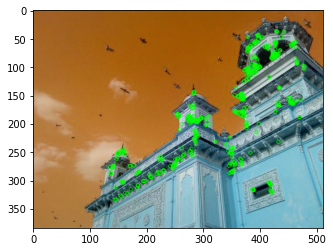

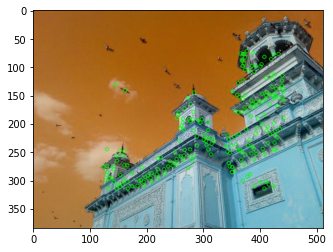

In [49]:
ORBimg('home.jpg')
BRIEFimg('home.jpg')

## **Ảnh simple**

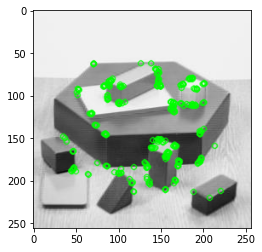

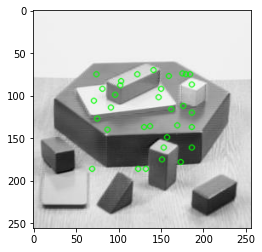

In [50]:
ORBimg('simple.jpg')
BRIEFimg('simple.jpg')

# **2. Features Matching**

## **Bruce-force Matching with ORB**

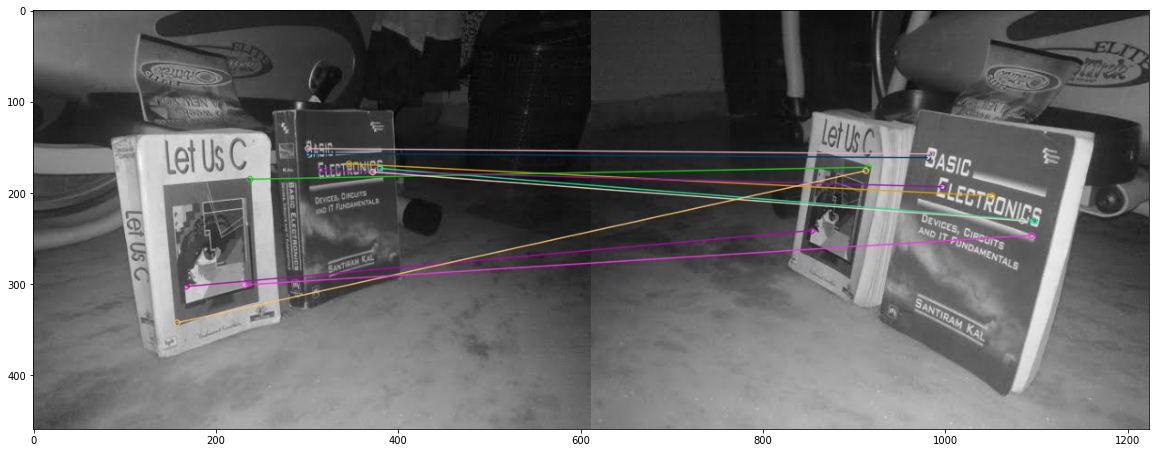

(<matplotlib.image.AxesImage at 0x7f4e2d559bd0>, None)

In [24]:
img1 = cv.imread('left.jpg',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('right.jpg',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(20,20))
plt.imshow(img3),plt.show()

## **Bruce-force Matching with BRIEF**

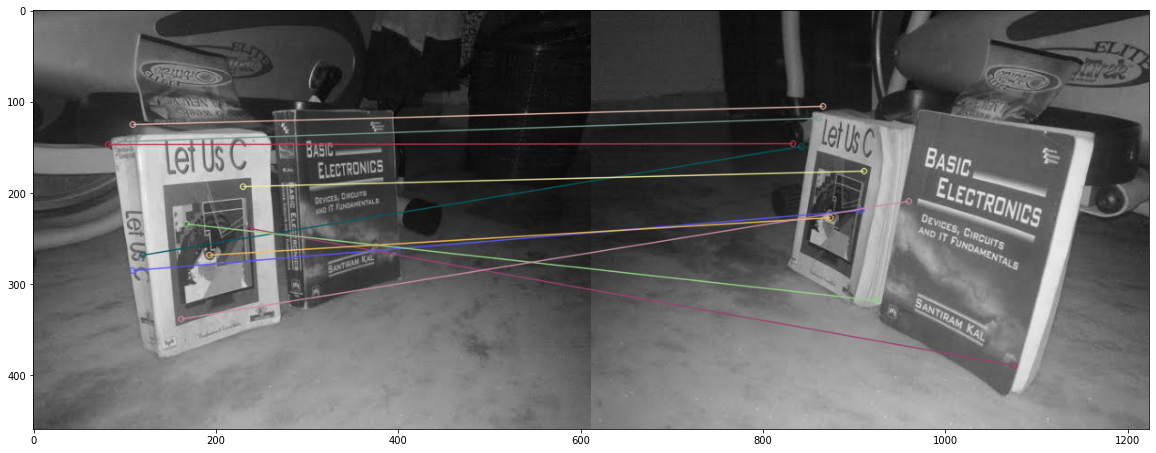

(<matplotlib.image.AxesImage at 0x7f4e2d4dd910>, None)

In [27]:
img1 = cv.imread('left.jpg',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('right.jpg',cv.IMREAD_GRAYSCALE)
# Initiate FAST detector
star = cv.xfeatures2d.StarDetector_create()
# Initiate BRIEF extractor
brief = cv.xfeatures2d.BriefDescriptorExtractor_create()
# find the keypoints with STAR
kp1 = star.detect(img1,None)
# compute the descriptors with BRIEF
kp1, des1 = brief.compute(img1, kp1)

kp2 = star.detect(img2,None)
kp2, des2 = brief.compute(img2, kp2)

bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(20,20))
plt.imshow(img3),plt.show()

## **FLANN Matching with ORB**

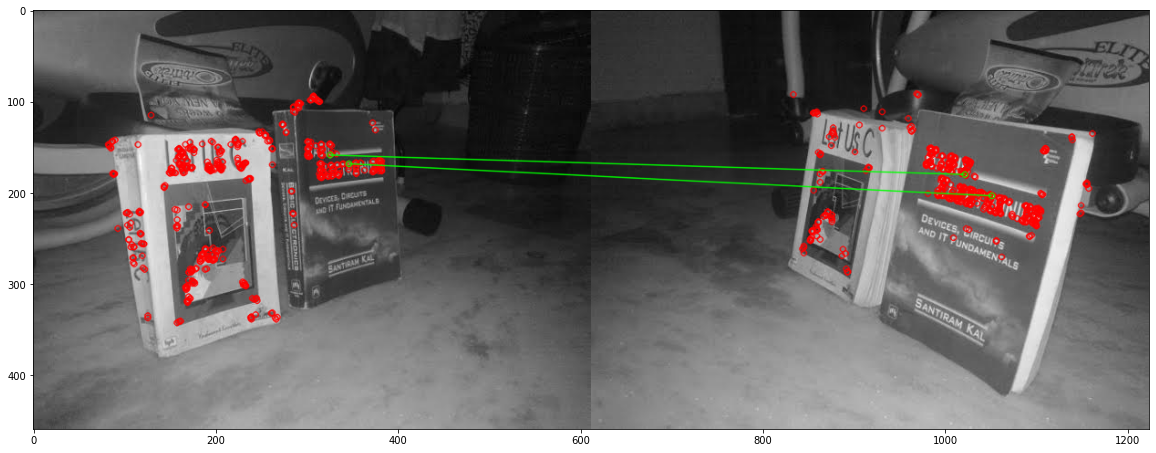

(<matplotlib.image.AxesImage at 0x7f4e2d671b10>, None)

In [32]:
img1 = cv2.imread( 'left.jpg',0)          # queryImage
img2 = cv2.imread( 'right.jpg',0) # trainImage

# Initiate SIFT detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)

des1 = np.float32(des1)
des2 = np.float32(des2)

matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.figure(figsize=(20,20))
plt.imshow(img3,),plt.show()

## **FLANN Matching with BRIEF**

In [35]:
img1 = cv2.imread('left.jpg', cv2.IMREAD_GRAYSCALE)          # queryImage
img2 = cv2.imread('right.jpg', cv2.IMREAD_GRAYSCALE) # trainImage

In [37]:
# Initiate FAST detector
star = cv2.xfeatures2d.StarDetector_create()
# Initiate BRIEF extractor
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
# find the keypoints with STAR
kp1_brief = star.detect(img1,None)
kp2_brief = star.detect(img2,None)
# compute the descriptors with BRIEF
kp1_brief, des1_brief = brief.compute(img1, kp1_brief)
kp2_brief, des2_brief = brief.compute(img2, kp2_brief)

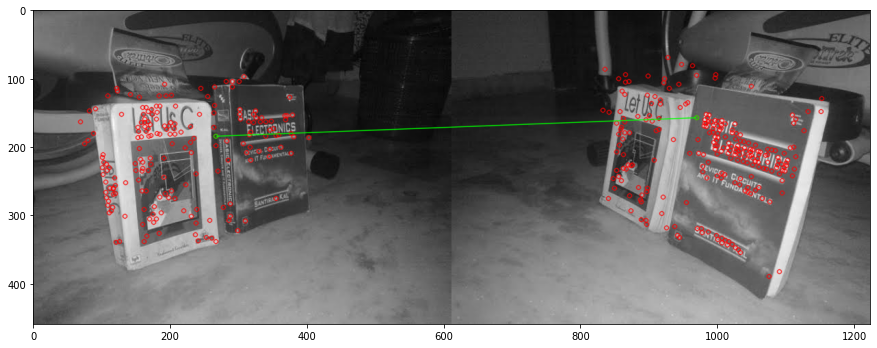

(<matplotlib.image.AxesImage at 0x7f4e2fe14310>, None)

In [40]:

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params,search_params)
des1_brief = np.float32(des1_brief)
des2_brief = np.float32(des2_brief)
matches = flann.knnMatch(des1_brief,des2_brief,k=2)
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv2.DrawMatchesFlags_DEFAULT)
img3 = cv2.drawMatchesKnn(img1,kp1_brief,img2,kp2_brief,matches,None,**draw_params)
plt.figure(figsize=(15,15))
plt.imshow(img3,),plt.show()